# STRATHMORE DATATHON CHALLENGE  

#### PROBLEM STATEMENT 
Bundas is a supermarket that has stores all over the country.Bundas has collected sales data for over 1000 products across its stores. ​Bundas has hired you as a data scientist to build a predictive model to find out the sales of each product at a particular store.  
Bundas plans on using this model to understand the properties of products and stores that play a paramount role in increasing sales

#### import libraries

In [1]:
#import libraries 
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib as mpl
import itertools
import datetime as dt
from scipy import stats
from IPython.display import display
import warnings
warnings.filterwarnings('ignore')
import os
import gc 
import pandas_profiling

##### Styles and aesthetics for the graphs 

In [8]:
#Setting styles and aesthetics
pd.options.display.max_columns =200
pd.options.display.max_rows =30
pd.options.display.float_format = '{:,.2f}'.format
plt.style.use('ggplot')
plt.rcParams['figure.figsize'] = (18, 8)
# Graphics in SVG format are more sharp and legible
%config InlineBackend.figure_format = 'svg'
%matplotlib inline

##### Load Data

In [100]:
#Read dataset
train_bundas=pd.read_csv('C:/Users/jonathan/Desktop/ilabdata/comp_bundas_train.csv')
test_bundas = pd.read_csv('C:/Users/jonathan/Desktop/ilabdata/comp_bundas_test.csv', encoding = "ISO-8859-1")

In [101]:
train_bundas['Item_ID'].unique()

array(['FDA15', 'DRC01', 'FDN15', ..., 'FDY32', 'FDV36', 'FDP15'],
      dtype=object)

In [102]:
train_bundas.Item_ID.unique() 


array(['FDA15', 'DRC01', 'FDN15', ..., 'FDY32', 'FDV36', 'FDP15'],
      dtype=object)

In [103]:
train_bundas["Item_ID"].value_counts()

NCB18    7
FDW49    7
NCL05    7
FDN21    7
FDY55    7
        ..
FDY43    1
FDZ50    1
FDB28    1
NCW05    1
FDF17    1
Name: Item_ID, Length: 1551, dtype: int64

##### Data dimension

In [104]:
# Check The Shape Of The Data Loaded
print('Train bundas shape: {} Rows, {} Columns'.format(*train_bundas.shape))
print('Test bundas shape: {} Rows, {} Columns'.format(*test_bundas.shape))

Train bundas shape: 6109 Rows, 14 Columns
Test bundas shape: 4055 Rows, 13 Columns


##### First five rows of Data

In [105]:
# Print First Few Rows Of The Data
display("train bundas")
display(train_bundas.head(5))
display("test bundas")
display(test_bundas.head(5))

'train bundas'

Unnamed: 0 Item_ID  Weight FatContent  Visibility      Category  Max_Price  \
0           1   FDA15    9.30    Low Fat        0.02         Dairy     249.81   
1           2   DRC01    5.92    Regular        0.02   Soft Drinks      48.27   
2           3   FDN15   17.50    Low Fat        0.02          Meat     141.62   
3           5   NCD19    8.93    Low Fat        0.00     Household      53.86   
4           6   FDP36   10.39    Regular        0.00  Baking Goods      51.40   

  Store_ID  Store_Establishment_Year Store_Size Store_Location_Type  \
0   OUT049                      1999     Medium              Tier 1   
1   OUT018                      2009     Medium              Tier 3   
2   OUT049                      1999     Medium              Tier 1   
3   OUT013                      1987       High              Tier 3   
4   OUT018                      2009     Medium              Tier 3   

          Store_Type  Item_Store_Sales  tracker  
0  Supermarket Type1          3,735.14        1  
1  Supermarket Type2            443.42        2  
2  Supermarket Type1          2,097.27        3  
3  Supermarket Type1            994.71        5  
4  Supermarket Type2            556.61        6

'test bundas'

Unnamed: 0 Item_ID  Weight FatContent  Visibility               Category  \
0           1   FDW58   20.75    Low Fat        0.01            Snack Foods   
1           6   FDH56    9.80    Regular        0.06  Fruits and Vegetables   
2           7   FDL48   19.35    Regular        0.08           Baking Goods   
3          14   FDU11    4.79    Low Fat        0.09                 Breads   
4          15   DRL59   16.75         LF        0.02            Hard Drinks   

   Max_Price Store_ID  Store_Establishment_Year Store_Size  \
0     107.86   OUT049                      1999     Medium   
1     117.15   OUT046                      1997      Small   
2      50.10   OUT018                      2009     Medium   
3     122.31   OUT049                      1999     Medium   
4      52.03   OUT013                      1987       High   

  Store_Location_Type         Store_Type  tracker  
0              Tier 1  Supermarket Type1        1  
1              Tier 1  Supermarket Type1        6  
2              Tier 3  Supermarket Type2        7  
3              Tier 1  Supermarket Type1       14  
4              Tier 3  Supermarket Type1       15

##### Description of the data

In [106]:
train_bundas.describe()

Unnamed: 0   Weight  Visibility  Max_Price  Store_Establishment_Year  \
count    6,109.00 6,109.00    6,109.00   6,109.00                  6,109.00   
mean     5,672.15    12.91        0.06     141.28                  1,995.80   
std      7,227.89     4.67        0.05      62.24                      8.84   
min          1.00     4.55        0.00      31.29                  1,985.00   
25%      2,232.00     8.79        0.03      94.05                  1,987.00   
50%      4,686.00    12.65        0.05     143.22                  1,997.00   
75%      7,127.00    17.00        0.09     185.96                  2,004.00   
max     85,110.00    21.35        0.33     266.89                  2,009.00   

       Item_Store_Sales  tracker  
count          6,109.00 6,109.00  
mean           2,322.64 4,280.64  
std            1,741.64 2,462.38  
min               33.96     1.00  
25%              974.73 2,151.00  
50%            1,928.16 4,295.00  
75%            3,266.41 6,415.00  
max           13,086.96 8,523.00

In [107]:
test_bundas.describe()

Unnamed: 0   Weight  Visibility  Max_Price  Store_Establishment_Year  \
count    4,055.00 4,055.00    4,055.00   4,055.00                  4,055.00   
mean     3,836.39    12.64        0.06     140.50                  1,995.84   
std      5,017.19     4.62        0.05      61.66                      8.83   
min          1.00     4.55        0.00      31.99                  1,985.00   
25%      1,523.50     8.64        0.03      93.73                  1,987.00   
50%      3,173.00    12.30        0.05     141.22                  1,997.00   
75%      4,796.50    16.60        0.09     185.36                  2,004.00   
max     55,510.00    21.35        0.32     266.59                  2,009.00   

       tracker  
count 4,055.00  
mean  2,858.15  
std   1,639.19  
min       1.00  
25%   1,439.00  
50%   2,848.00  
75%   4,276.50  
max   5,678.00

### Data exploration 

###### Checking null values 

In [108]:
# Checking Null values in Train Set
train_bundas.isnull().sum()

Unnamed: 0                  0
Item_ID                     0
Weight                      0
FatContent                  0
Visibility                  0
Category                    0
Max_Price                   0
Store_ID                    0
Store_Establishment_Year    0
Store_Size                  0
Store_Location_Type         0
Store_Type                  0
Item_Store_Sales            0
tracker                     0
dtype: int64

In [109]:
# Checking Null values in test Set
test_bundas.isnull().sum()

Unnamed: 0                  0
Item_ID                     0
Weight                      0
FatContent                  0
Visibility                  0
Category                    0
Max_Price                   0
Store_ID                    0
Store_Establishment_Year    0
Store_Size                  0
Store_Location_Type         0
Store_Type                  0
tracker                     0
dtype: int64

##### Variable names of the data 

In [110]:
display("train bundas")
display(train_bundas.columns)
display("test bundas")
display(test_bundas.columns)

'train bundas'

Index(['Unnamed: 0', 'Item_ID', 'Weight', 'FatContent', 'Visibility',
       'Category', 'Max_Price', 'Store_ID', 'Store_Establishment_Year',
       'Store_Size', 'Store_Location_Type', 'Store_Type', 'Item_Store_Sales',
       'tracker'],
      dtype='object')

'test bundas'

Index(['Unnamed: 0', 'Item_ID', 'Weight', 'FatContent', 'Visibility',
       'Category', 'Max_Price', 'Store_ID', 'Store_Establishment_Year',
       'Store_Size', 'Store_Location_Type', 'Store_Type', 'tracker'],
      dtype='object')

##### type of columns 

In [111]:
# Number of each type of column
display("train bundas")
display(train_bundas.dtypes.value_counts())
display("test bundas")
display(test_bundas.dtypes.value_counts())


'train bundas'

object     7
float64    4
int64      3
dtype: int64

'test bundas'

object     7
float64    3
int64      3
dtype: int64

In [112]:
train_bundas.dtypes

Unnamed: 0                    int64
Item_ID                      object
Weight                      float64
FatContent                   object
Visibility                  float64
Category                     object
Max_Price                   float64
Store_ID                     object
Store_Establishment_Year      int64
Store_Size                   object
Store_Location_Type          object
Store_Type                   object
Item_Store_Sales            float64
tracker                       int64
dtype: object

In [113]:
test_bundas.dtypes

Unnamed: 0                    int64
Item_ID                      object
Weight                      float64
FatContent                   object
Visibility                  float64
Category                     object
Max_Price                   float64
Store_ID                     object
Store_Establishment_Year      int64
Store_Size                   object
Store_Location_Type          object
Store_Type                   object
tracker                       int64
dtype: object

##### Structure of the data

Use pandas profiling to get summary details of each dataset



In [114]:
import pandas_profiling



An html file will be create in html folder, it will have the summary of the dataset 

In [115]:
profile = pandas_profiling.ProfileReport(train_bundas)
profile.to_file(output_file="C:/Users/jonathan/Desktop/ilabdata/html/bundas_train.htm")

In [116]:
profile = pandas_profiling.ProfileReport(test_bundas)
profile.to_file(output_file="C:/Users/jonathan/Desktop/ilabdata/html/bundas_test.htm")

### Explore each feature of the dataframe idividually 

###### fat content

In [117]:
train_bundas.loc[train_bundas['FatContent'] == 'LF', 'FatContent'] = 'Low Fat'
train_bundas.loc[train_bundas['FatContent'] == 'reg', 'FatContent'] = 'Regular'
train_bundas.loc[train_bundas['FatContent'] == 'low fat', 'FatContent'] = 'Low Fat'

In [118]:
train_bundas['FatContent'].unique()

array(['Low Fat', 'Regular'], dtype=object)

In [119]:
train_bundas["FatContent"].value_counts()

Low Fat    3954
Regular    2155
Name: FatContent, dtype: int64

###### Category

In [120]:
train_bundas['Category'].unique()

array(['Dairy', 'Soft Drinks', 'Meat', 'Household', 'Baking Goods',
       'Snack Foods', 'Fruits and Vegetables', 'Breakfast',
       'Health and Hygiene', 'Frozen Foods', 'Hard Drinks', 'Canned',
       'Starchy Foods', 'Breads', 'Others', 'Seafood'], dtype=object)

In [121]:
train_bundas["Category"].value_counts()

Fruits and Vegetables    883
Snack Foods              867
Household                649
Frozen Foods             614
Dairy                    495
Canned                   471
Baking Goods             462
Health and Hygiene       367
Soft Drinks              312
Meat                     309
Breads                   179
Hard Drinks              148
Others                   123
Starchy Foods            105
Breakfast                 79
Seafood                   46
Name: Category, dtype: int64

###### Store Establishment Year

In [122]:

train_bundas['Store_Establishment_Year'].unique()

array([1999, 2009, 1987, 1997, 2004, 1985], dtype=int64)

In [123]:
train_bundas["Store_Establishment_Year"].value_counts()

1985    1459
1987     932
1999     930
1997     930
2004     930
2009     928
Name: Store_Establishment_Year, dtype: int64

###### Store_Size

In [124]:
train_bundas['Store_Size'].unique()

array(['Medium', 'High', 'Small'], dtype=object)

In [125]:
train_bundas["Store_Size"].value_counts()

Medium    2790
Small     2387
High       932
Name: Store_Size, dtype: int64

###### Store_Location_Type

In [126]:
train_bundas['Store_Location_Type'].unique()

array(['Tier 1', 'Tier 3', 'Tier 2'], dtype=object)

In [127]:
train_bundas["Store_Location_Type"].value_counts()

Tier 3    2792
Tier 1    2387
Tier 2     930
Name: Store_Location_Type, dtype: int64

###### Store_Type

In [128]:
train_bundas['Store_Type'].unique()

array(['Supermarket Type1', 'Supermarket Type2', 'Supermarket Type3',
       'Grocery Store'], dtype=object)

In [129]:
train_bundas["Store_Type"].value_counts()

Supermarket Type1    3722
Supermarket Type3     932
Supermarket Type2     928
Grocery Store         527
Name: Store_Type, dtype: int64

###### Sales 

In [130]:
print('Highest Sales amount is:', train_bundas['Item_Store_Sales'].max())
print('Lowest Sales amount is:', train_bundas['Item_Store_Sales'].min())
print('Average Sales amount is:', train_bundas['Item_Store_Sales'].mean())
print('Median Sales amount is:', train_bundas['Item_Store_Sales'].median())

Highest Sales amount is: 13086.9648
Lowest Sales amount is: 33.9558
Average Sales amount is: 2322.641392732035
Median Sales amount is: 1928.1568


###### Item

In [131]:
train_bundas['Item_ID'].unique()

array(['FDA15', 'DRC01', 'FDN15', ..., 'FDY32', 'FDV36', 'FDP15'],
      dtype=object)

In [132]:
train_bundas["Item_ID"].value_counts()

NCB18    7
FDW49    7
NCL05    7
FDN21    7
FDY55    7
        ..
FDY43    1
FDZ50    1
FDB28    1
NCW05    1
FDF17    1
Name: Item_ID, Length: 1551, dtype: int64

###### Store

In [133]:
train_bundas['Store_ID'].unique()

array(['OUT049', 'OUT018', 'OUT013', 'OUT046', 'OUT035', 'OUT027',
       'OUT019'], dtype=object)

In [134]:
train_bundas["Store_ID"].value_counts()

OUT027    932
OUT013    932
OUT035    930
OUT049    930
OUT046    930
OUT018    928
OUT019    527
Name: Store_ID, dtype: int64

### Visual Exploration

In [135]:
import matplotlib.pyplot as plt


In [136]:
import seaborn as sns
# Use seaborn style defaults and set the default figure size
sns.set(rc={'figure.figsize':(11, 4)})

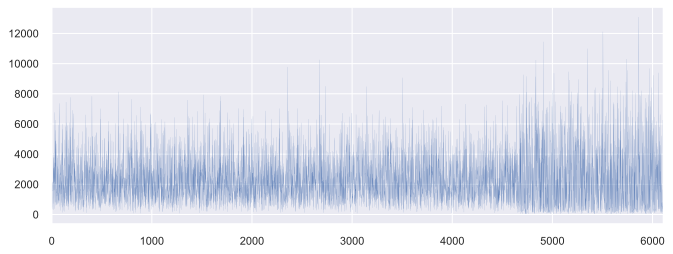

In [137]:
train_bundas['Item_Store_Sales'].plot(linewidth=0.1);


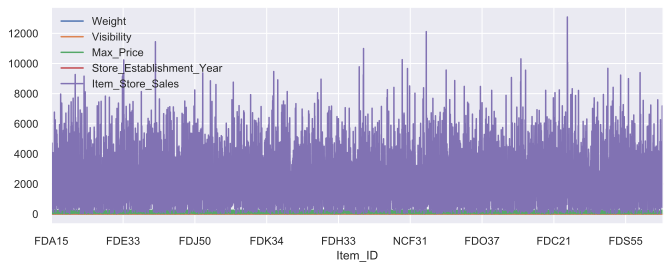

In [138]:
from pandas import read_csv
from matplotlib import pyplot
series = read_csv('bundas_train.csv', header=0, index_col=0, parse_dates=True, squeeze=True)
series.plot()
pyplot.show()

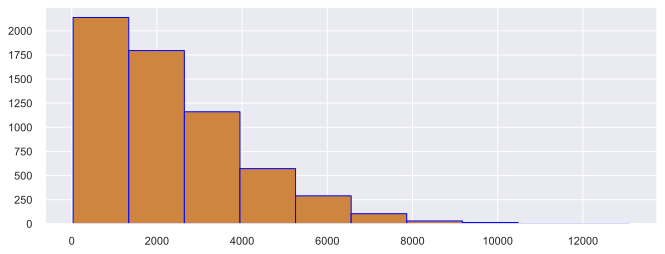

In [139]:
from pandas import read_csv
from matplotlib import pyplot
plt.hist(train_bundas['Item_Store_Sales'],
        facecolor='peru',
        edgecolor='blue',
        bins=10)
plt.show()


This is a left skew distribution



array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001C2D2060E48>,
      dtype=object)

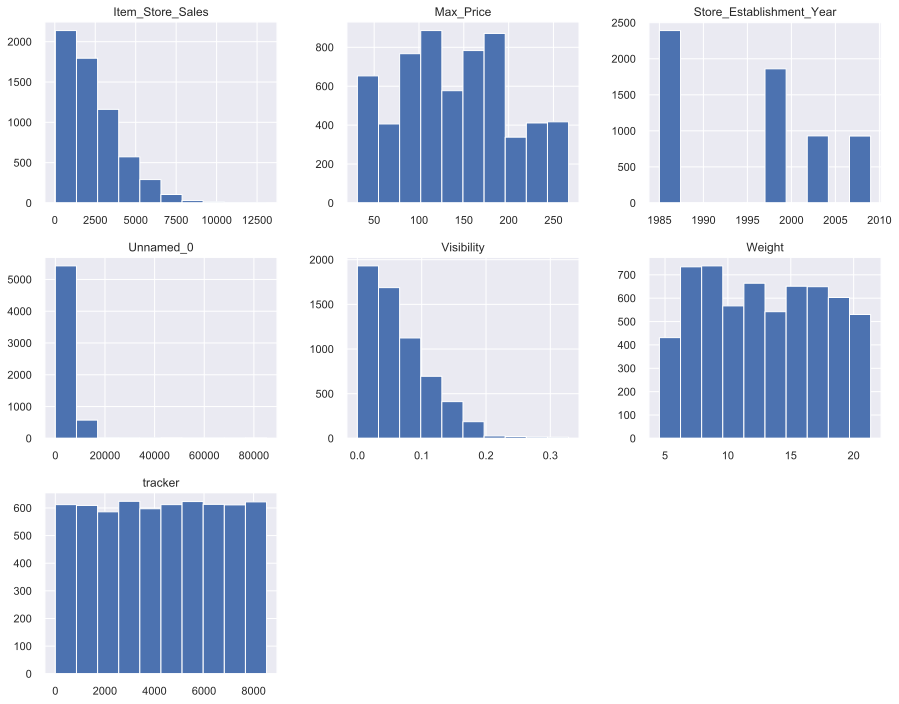

In [140]:
train_bundas.hist(figsize=(15,12))

###### Weight

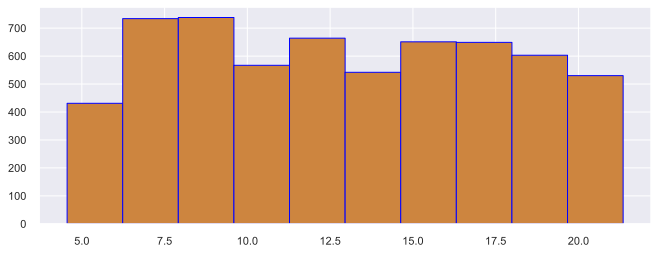

In [141]:
plt.hist(train_bundas['Weight'],
        facecolor='peru',
        edgecolor='blue',
        bins=10)
plt.show()

From this plot we can see that the weight of the items are distributed pretty equally.



###### Fat Content

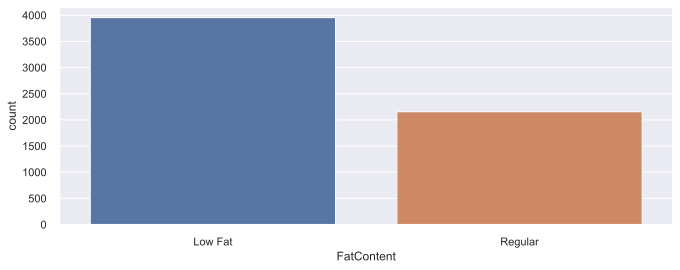

In [142]:
sns.countplot(train_bundas.FatContent)

we can see that the Low Fat products is the bigger part of the sales comparing with Regular fat

###### Category

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15]),
 <a list of 16 Text xticklabel objects>)

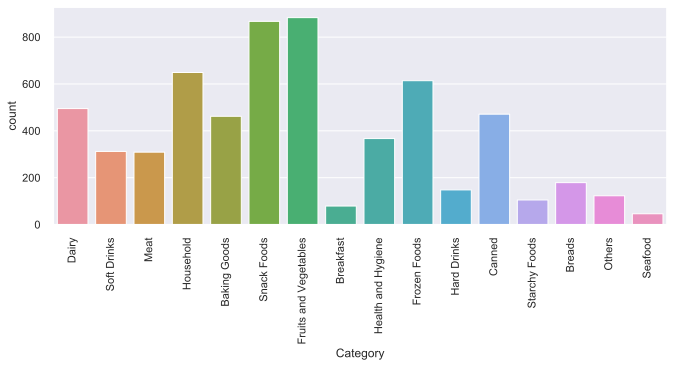

In [143]:
sns.countplot(train_bundas.Category)
plt.xticks(rotation=90)

 Fruits and Vegetables and Snack Foods are the first two categories in all sales. 

###### Store size

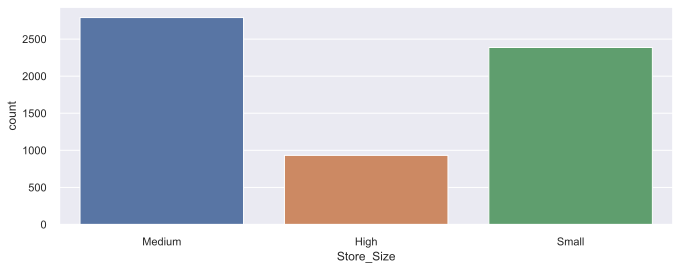

In [144]:
sns.countplot(train_bundas.Store_Size)


###### Store Location Type

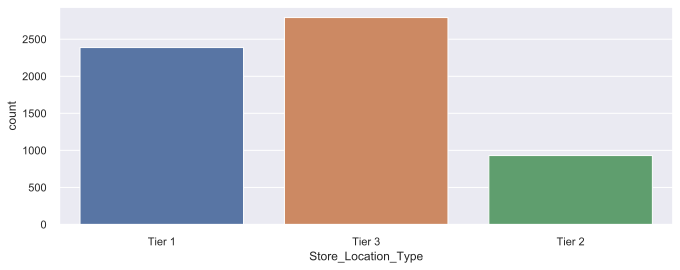

In [145]:
sns.countplot(train_bundas.Store_Location_Type)

###### Store Type

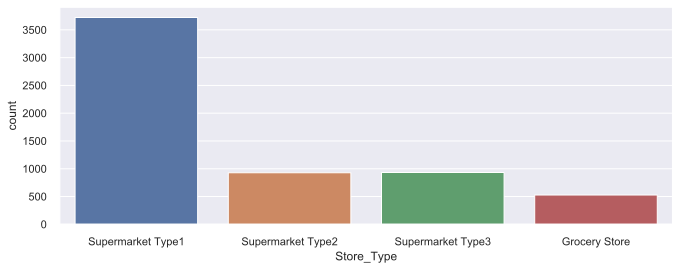

In [146]:
sns.countplot(train_bundas.Store_Type)

The Supermarket type 1 supermarket is the main form of Bundas, over 5000 places are  supermarket type 1. Others are around 1000 stores.

#### Weight and Item store Sales

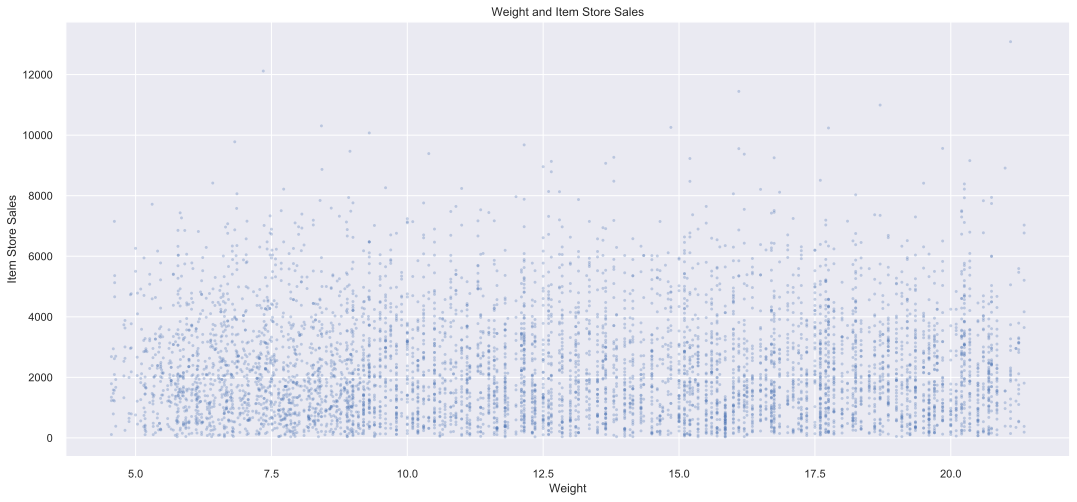

In [147]:
plt.figure(figsize=(18,8))
plt.xlabel("Weight")
plt.ylabel("Item Store Sales")
plt.title("Weight and Item Store Sales")
plt.plot(train_bundas.Weight, train_bundas["Item_Store_Sales"],'.', alpha = 0.3)

###### visibility and item store sales

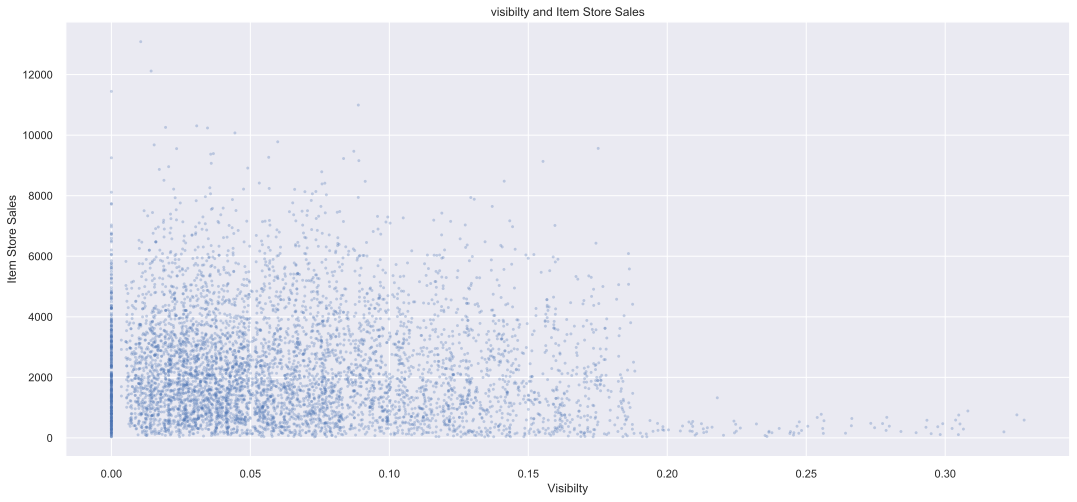

In [148]:
plt.figure(figsize=(18,8))
plt.xlabel("Visibilty")
plt.ylabel("Item Store Sales")
plt.title("visibilty and Item Store Sales")
plt.plot(train_bundas.Visibility, train_bundas["Item_Store_Sales"],'.', alpha = 0.3)

most of sales has been obtained from products whose visibility is less than 0.20

###### Category and item store sales

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15]),
 <a list of 16 Text xticklabel objects>)

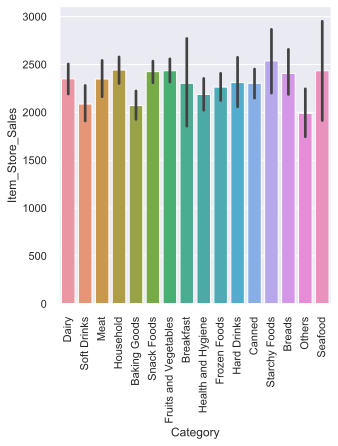

In [149]:
sns.catplot(x="Category", y="Item_Store_Sales", kind="bar", data=train_bundas);
plt.xticks(rotation=90)

Fruits and Vegetables, stanchy food, seafood contribute to the highest amount item store sales.


###### Fat content and Item Store Sales

(array([0, 1]), <a list of 2 Text xticklabel objects>)

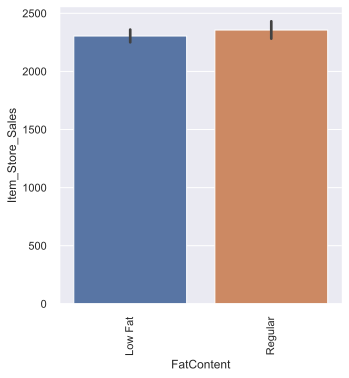

In [150]:
sns.catplot(x="FatContent", y="Item_Store_Sales", kind="bar", data=train_bundas);
plt.xticks(rotation=90)

###### Store and Item store sales

(array([0, 1, 2, 3, 4, 5, 6]), <a list of 7 Text xticklabel objects>)

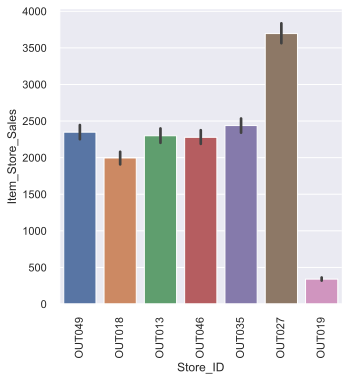

In [151]:
sns.catplot(x="Store_ID", y="Item_Store_Sales", kind="bar", data=train_bundas);
plt.xticks(rotation=90)

OUT027 store contributed the largest amount of the item store sales.



###### Store size and item store sale

(array([0, 1, 2]), <a list of 3 Text xticklabel objects>)

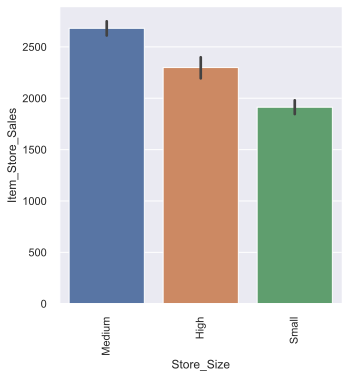

In [152]:
sns.catplot(x="Store_Size", y="Item_Store_Sales", kind="bar", data=train_bundas);
plt.xticks(rotation=90)

###### Store Location Type and Item Store Sales

(array([0, 1, 2]), <a list of 3 Text xticklabel objects>)

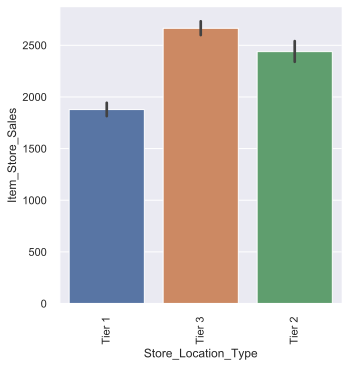

In [153]:
sns.catplot(x="Store_Location_Type", y="Item_Store_Sales", kind="bar", data=train_bundas);
plt.xticks(rotation=90)

###### Store Type and item Store Sales

(array([0, 1, 2, 3]), <a list of 4 Text xticklabel objects>)

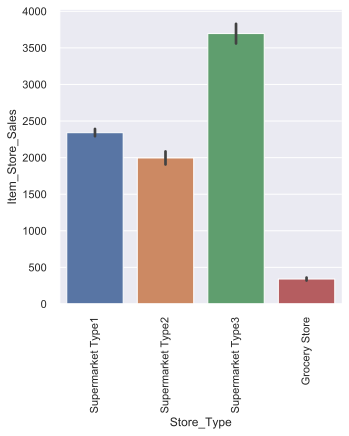

In [154]:
sns.catplot(x="Store_Type", y="Item_Store_Sales", kind="bar", data=train_bundas);
plt.xticks(rotation=90)

##### Store Establishment Year and item store sales

(array([0, 1, 2, 3, 4, 5]), <a list of 6 Text xticklabel objects>)

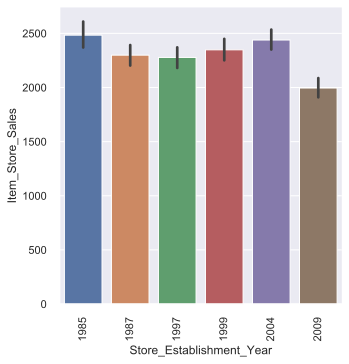

In [155]:
sns.catplot(x="Store_Establishment_Year", y="Item_Store_Sales", kind="bar", data=train_bundas);
plt.xticks(rotation=90)

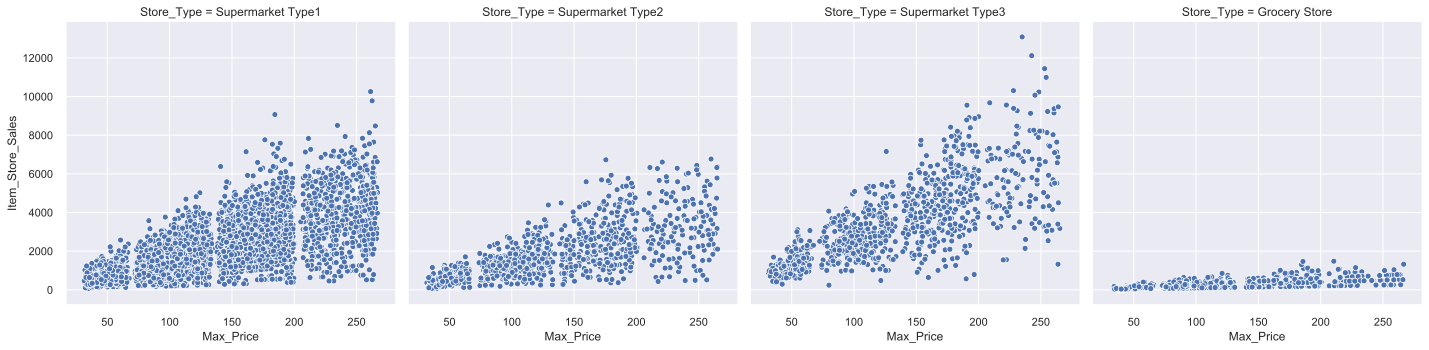

In [156]:
sns.relplot(x='Max_Price',y='Item_Store_Sales',col='Store_Type',data=train_bundas)

 Max_price and item store sales have relationship among 3 types of supermarkets in the Store Type columns, but the relationship
is not very visible in grocery store.

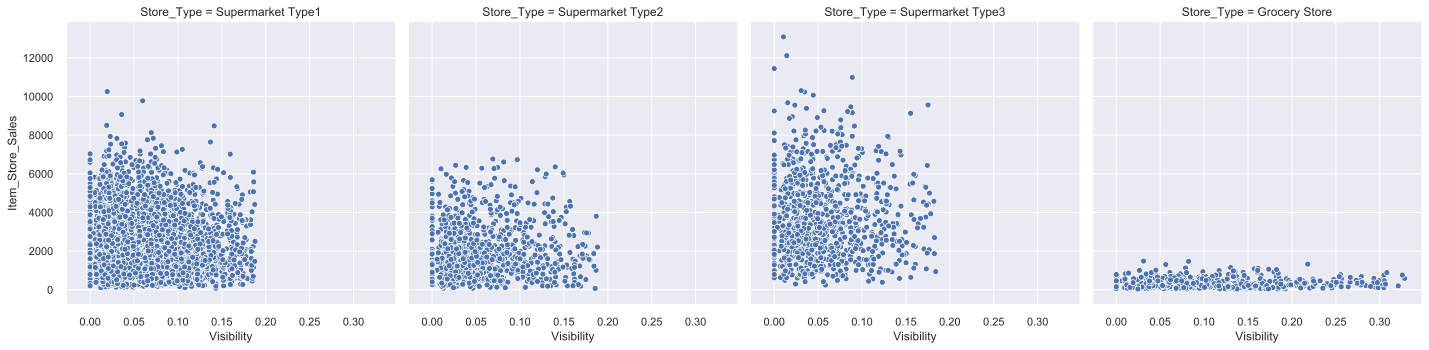

In [157]:
sns.relplot(x='Visibility',y='Item_Store_Sales',col='Store_Type',data=train_bundas)

in grocery stores, item visibility almost doesn’t affect sales, in supermarket types, it seems like while the visibility go higher, the sales is going down. this observation is not the same for the 4, to be safe i will say that visibility doesn't a strong impact to the sales


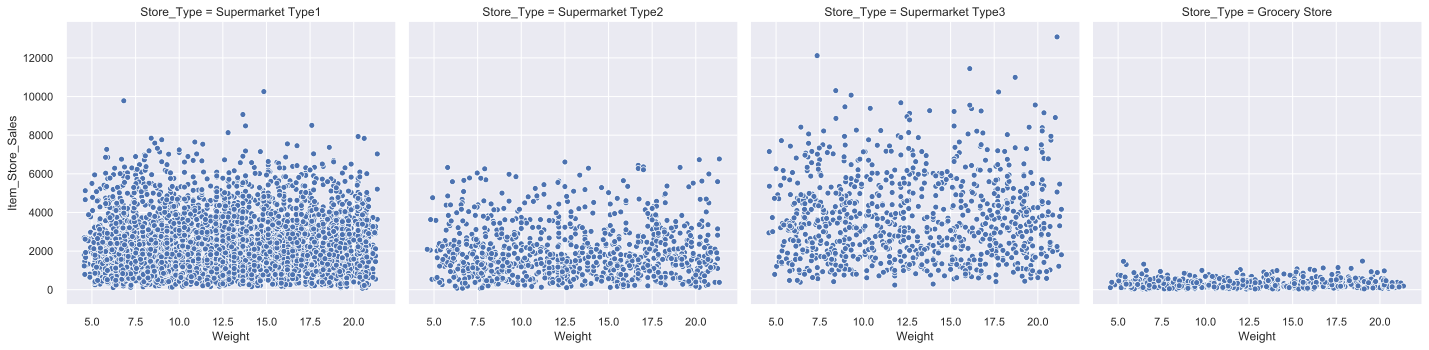

In [158]:
sns.relplot(x='Weight',y='Item_Store_Sales',col='Store_Type',data=train_bundas)

the weight doesn't affect the items store sales

In [1]:
sns.relplot(x='FatContent',y='Item_Store_Sales',col='Store_Type',data=train_bundas)

NameError: name 'sns' is not defined

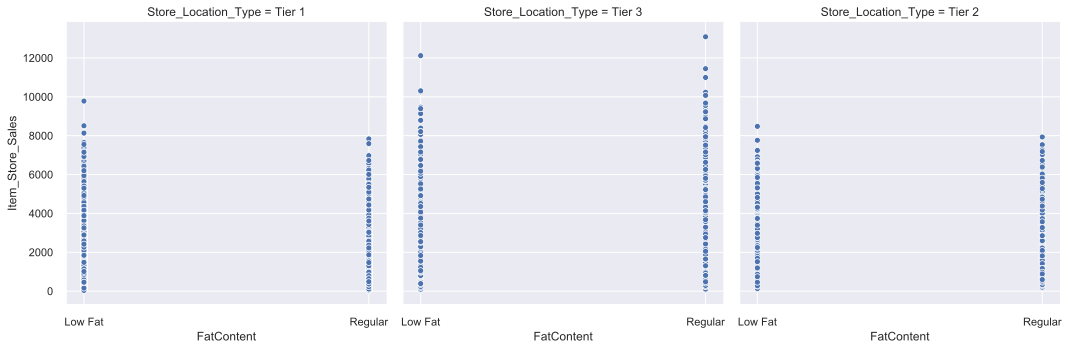

In [160]:
sns.relplot(x='FatContent',y='Item_Store_Sales',col='Store_Location_Type',data=train_bundas)

In [161]:
from matplotlib import pyplot as plt
import seaborn as sns

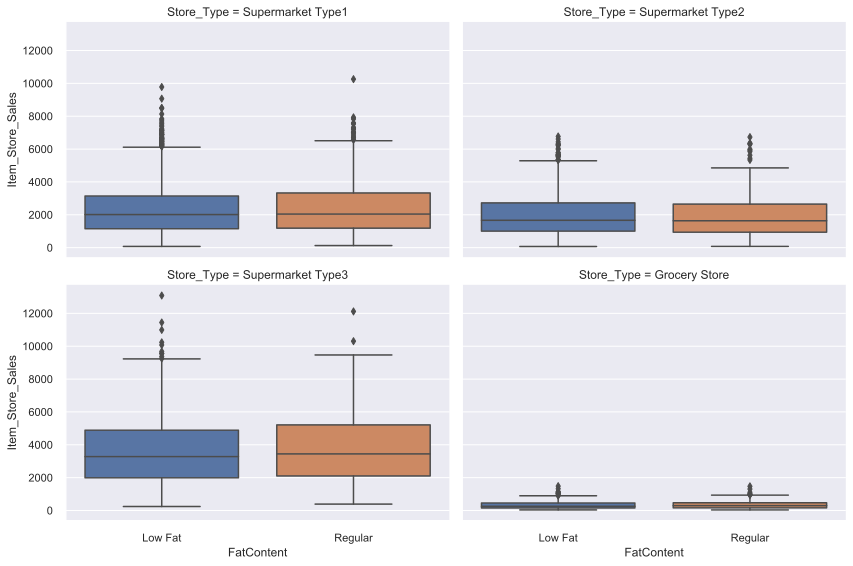

In [162]:
grid = sns.catplot(x='FatContent', y='Item_Store_Sales', col='Store_Type', col_wrap=2, data=train_bundas, kind='box', height=4, aspect=1.5)


the low fat and regular sales in supermarket 3 and tier 3 are higher than others,  also tier 3 has the all the item store sales



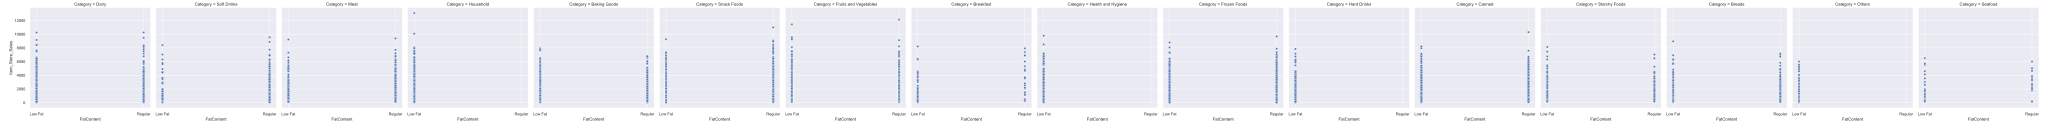

In [163]:
sns.relplot(x='FatContent',y='Item_Store_Sales',col='Category',data=train_bundas)

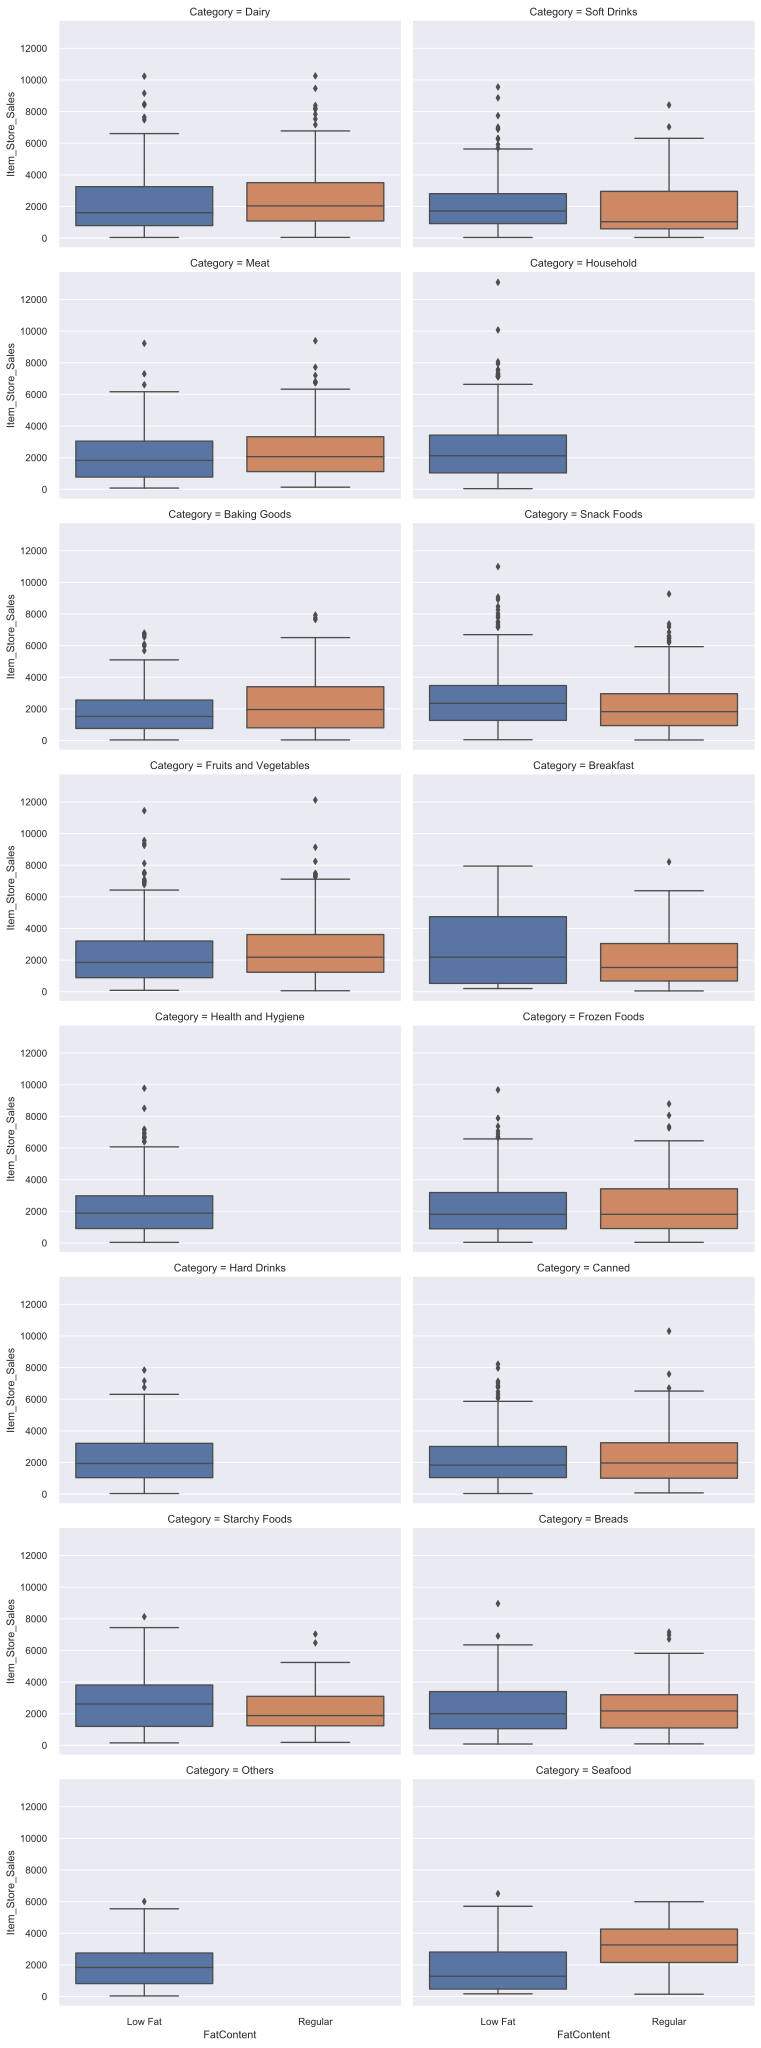

In [164]:
grid = sns.catplot(x='FatContent', y='Item_Store_Sales', col='Category', col_wrap=2, data=train_bundas, kind='box', height=4, aspect=1.5)


## Feature engineering

##### imputer missing value with the means

In [165]:
from sklearn.preprocessing import Imputer

# Dealing with the NAs
  
We discovered there are blanks in the weight (1463) collum and the store size (2410).  
After a deeper analysis we discovered that some of the missing entries for weights collumn have the same item id as the products with the weight entries hence we decided to fill up the entries with blanks considering their item id. 
   
For this part we used R and the codes are as seen below.  

### Loading the data set and needed packages
setwd("c:/Users/user/Desktop/Bundas")
df<-read.csv("bundas_train.csv",na.strings=c(" ","NA",""))
ts<-read.csv("bundas_test.csv",na.strings=c(" ","NA",""))
library("dplyr");library("plyr")

colSums(is.na(df))

df$tracker<-1:nrow(df)

#### getting columns with the weight entries
drna<-df[complete.cases(df$Weight),]

tra<-drna$tracker

# the entries without any weight entries
dropd<-df[-tra,]

## confirming the combined splits are the same as the original data
nrow(drna)+nrow(dropd)
nrow(df)


colSums(is.na(drna))

weigts<-drna %>% 
  group_by(Item_ID,Weight) %>% 
  summarise(x=1)

colnames(weigts)<-c("Item_ID","Weight_al","x")
compwight<-left_join(dropd, weigts[,-3], by="Item_ID")

compwight$Weight<-compwight$Weight_al

Only 4 entries remain without any entries in the weights columns

colSums(is.na((compwight)))
## combining the two to create a new data set
cmw_df<-rbind(drna,compwight[,-14])

## looking at the size column to determine way of replacing the blanks

stor<-cmw_df[complete.cases(cmw_df$Store_Size),]
instor<-cmw_df[complete.cases(cmw_df$Store_Size)==FALSE,]


nrow(stor)+nrow(instor)
nrow(df)

totll<-sum(df$Item_Store_Sales)

#### Looking at the percentage of sales accounted for by all the stores.
This is so as to help us see what effect dropping the rows without entries will have.

aSTORES<-df %>% 
  group_by(df$Store_ID,df$Store_Establishment_Year,df$Store_Type,df$Store_Location_Type) %>% 
  summarise(total=sum(Item_Store_Sales)) %>% 
  mutate(per=(total/aass)*100)



Looking at the percentage of sales accounted for by the three stores with missing size
bSTORES<-instor %>% 
  group_by(Store_ID,Store_Establishment_Year,Store_Type,Store_Location_Type) %>% 
  summarise(x=sum(Item_Store_Sales)) %>% 
  mutate(per=(x/aass)*100)

Looking at the percentage of sales accounted for by the sevenstores with the size indicated
cSTORES<-stor %>% 
  group_by(Store_ID,Store_Establishment_Year,Store_Type,Store_Location_Type,Store_Size) %>% 
  summarise(total=sum(Item_Store_Sales)) %>% 
  mutate(per=(total/aass)*100)

we decideD to drop the empy rows, in doing so we loose 28.32% of our original test data which accounts for 23% of our sales 

fin_df<-cmw_df[complete.cases(cmw_df),]
sum(bSTORES$per)
(1-nrow(fin_df)/nrow(df))*100

write.csv(fin_df,"comp_bundas_train.csv")



In [166]:
 
df_mean_imputed = pd.read_csv('C:/Users/jonathan/Desktop/ilabdata/comp_bundas_train.csv')

In [167]:
# Checking Null values in test Set
df_mean_imputed.isnull().sum()

Unnamed: 0                  0
Item_ID                     0
Weight                      0
FatContent                  0
Visibility                  0
Category                    0
Max_Price                   0
Store_ID                    0
Store_Establishment_Year    0
Store_Size                  0
Store_Location_Type         0
Store_Type                  0
Item_Store_Sales            0
tracker                     0
dtype: int64

In [168]:
# pandas drop a column with drop function
df_mean_imputed.drop(['tracker'], axis=1)

Unnamed: 0 Item_ID  Weight FatContent  Visibility  \
0              1   FDA15    9.30    Low Fat        0.02   
1              2   DRC01    5.92    Regular        0.02   
2              3   FDN15   17.50    Low Fat        0.02   
3              5   NCD19    8.93    Low Fat        0.00   
4              6   FDP36   10.39    Regular        0.00   
...          ...     ...     ...        ...         ...   
6104       14591   DRK37    5.00    Low Fat        0.04   
6105       14601   DRG13   17.25    Low Fat        0.04   
6106       14611   NCN14   19.10    Low Fat        0.09   
6107       14621   FDU44   12.15    Regular        0.10   
6108        1463   NCN18    8.89    Low Fat        0.12   

                   Category  Max_Price Store_ID  Store_Establishment_Year  \
0                     Dairy     249.81   OUT049                      1999   
1               Soft Drinks      48.27   OUT018                      2009   
2                      Meat     141.62   OUT049                      1999   
3                 Household      53.86   OUT013                      1987   
4              Baking Goods      51.40   OUT018                      2009   
...                     ...        ...      ...                       ...   
6104            Soft Drinks     189.05   OUT027                      1985   
6105            Soft Drinks     164.75   OUT027                      1985   
6106                 Others     184.66   OUT027                      1985   
6107  Fruits and Vegetables     162.36   OUT019                      1985   
6108              Household     111.75   OUT027                      1985   

     Store_Size Store_Location_Type         Store_Type  Item_Store_Sales  
0        Medium              Tier 1  Supermarket Type1          3,735.14  
1        Medium              Tier 3  Supermarket Type2            443.42  
2        Medium              Tier 1  Supermarket Type1          2,097.27  
3          High              Tier 3  Supermarket Type1            994.71  
4        Medium              Tier 3  Supermarket Type2            556.61  
...         ...                 ...                ...               ...  
6104     Medium              Tier 3  Supermarket Type3          6,261.85  
6105     Medium              Tier 3  Supermarket Type3          4,111.31  
6106     Medium              Tier 3  Supermarket Type3          2,756.41  
6107      Small              Tier 1      Grocery Store            487.37  
6108     Medium              Tier 3  Supermarket Type3          4,138.61  

[6109 rows x 13 columns]

In [169]:
df_mean_imputed.dropna()

Unnamed: 0 Item_ID  Weight FatContent  Visibility  \
0              1   FDA15    9.30    Low Fat        0.02   
1              2   DRC01    5.92    Regular        0.02   
2              3   FDN15   17.50    Low Fat        0.02   
3              5   NCD19    8.93    Low Fat        0.00   
4              6   FDP36   10.39    Regular        0.00   
...          ...     ...     ...        ...         ...   
6104       14591   DRK37    5.00    Low Fat        0.04   
6105       14601   DRG13   17.25    Low Fat        0.04   
6106       14611   NCN14   19.10    Low Fat        0.09   
6107       14621   FDU44   12.15    Regular        0.10   
6108        1463   NCN18    8.89    Low Fat        0.12   

                   Category  Max_Price Store_ID  Store_Establishment_Year  \
0                     Dairy     249.81   OUT049                      1999   
1               Soft Drinks      48.27   OUT018                      2009   
2                      Meat     141.62   OUT049                      1999   
3                 Household      53.86   OUT013                      1987   
4              Baking Goods      51.40   OUT018                      2009   
...                     ...        ...      ...                       ...   
6104            Soft Drinks     189.05   OUT027                      1985   
6105            Soft Drinks     164.75   OUT027                      1985   
6106                 Others     184.66   OUT027                      1985   
6107  Fruits and Vegetables     162.36   OUT019                      1985   
6108              Household     111.75   OUT027                      1985   

     Store_Size Store_Location_Type         Store_Type  Item_Store_Sales  \
0        Medium              Tier 1  Supermarket Type1          3,735.14   
1        Medium              Tier 3  Supermarket Type2            443.42   
2        Medium              Tier 1  Supermarket Type1          2,097.27   
3          High              Tier 3  Supermarket Type1            994.71   
4        Medium              Tier 3  Supermarket Type2            556.61   
...         ...                 ...                ...               ...   
6104     Medium              Tier 3  Supermarket Type3          6,261.85   
6105     Medium              Tier 3  Supermarket Type3          4,111.31   
6106     Medium              Tier 3  Supermarket Type3          2,756.41   
6107      Small              Tier 1      Grocery Store            487.37   
6108     Medium              Tier 3  Supermarket Type3          4,138.61   

      tracker  
0           1  
1           2  
2           3  
3           5  
4           6  
...       ...  
6104     8486  
6105     8488  
6106     8489  
6107     8491  
6108     8505  

[6109 rows x 14 columns]

In [170]:

modDf = df_mean_imputed.dropna(how='any', subset=['Store_Size'])

In [171]:
modDf.head(20)

Unnamed: 0 Item_ID  Weight FatContent  Visibility               Category  \
0            1   FDA15    9.30    Low Fat        0.02                  Dairy   
1            2   DRC01    5.92    Regular        0.02            Soft Drinks   
2            3   FDN15   17.50    Low Fat        0.02                   Meat   
3            5   NCD19    8.93    Low Fat        0.00              Household   
4            6   FDP36   10.39    Regular        0.00           Baking Goods   
5            7   FDO10   13.65    Regular        0.01            Snack Foods   
6           11   FDY07   11.80    Low Fat        0.00  Fruits and Vegetables   
7           12   FDA03   18.50    Regular        0.05                  Dairy   
8           13   FDX32   15.10    Regular        0.10  Fruits and Vegetables   
9           14   FDS46   17.60    Regular        0.05            Snack Foods   
10          15   FDF32   16.35    Low Fat        0.07  Fruits and Vegetables   
11          16   FDP49    9.00    Regular        0.07              Breakfast   
12          17   NCB42   11.80    Low Fat        0.01     Health and Hygiene   
13          18   FDP49    9.00    Regular        0.07              Breakfast   
14          20   FDU02   13.35    Low Fat        0.10                  Dairy   
15          21   FDN22   18.85    Regular        0.14            Snack Foods   
16          23   NCB30   14.60    Low Fat        0.03              Household   
17          25   FDR28   13.85    Regular        0.03           Frozen Foods   
18          27   FDV10    7.64    Regular        0.07            Snack Foods   
19          28   DRJ59   11.65    low fat        0.02            Hard Drinks   

    Max_Price Store_ID  Store_Establishment_Year Store_Size  \
0      249.81   OUT049                      1999     Medium   
1       48.27   OUT018                      2009     Medium   
2      141.62   OUT049                      1999     Medium   
3       53.86   OUT013                      1987       High   
4       51.40   OUT018                      2009     Medium   
5       57.66   OUT013                      1987       High   
6       45.54   OUT049                      1999     Medium   
7      144.11   OUT046                      1997      Small   
8      145.48   OUT049                      1999     Medium   
9      119.68   OUT046                      1997      Small   
10     196.44   OUT013                      1987       High   
11      56.36   OUT046                      1997      Small   
12     115.35   OUT018                      2009     Medium   
13      54.36   OUT049                      1999     Medium   
14     230.54   OUT035                      2004      Small   
15     250.87   OUT013                      1987       High   
16     196.51   OUT035                      2004      Small   
17     165.02   OUT046                      1997      Small   
18      42.31   OUT035                      2004      Small   
19      39.12   OUT013                      1987       High   

   Store_Location_Type         Store_Type  Item_Store_Sales  tracker  
0               Tier 1  Supermarket Type1          3,735.14        1  
1               Tier 3  Supermarket Type2            443.42        2  
2               Tier 1  Supermarket Type1          2,097.27        3  
3               Tier 3  Supermarket Type1            994.71        5  
4               Tier 3  Supermarket Type2            556.61        6  
5               Tier 3  Supermarket Type1            343.55        7  
6               Tier 1  Supermarket Type1          1,516.03       11  
7               Tier 1  Supermarket Type1          2,187.15       12  
8               Tier 1  Supermarket Type1          1,589.26       13  
9               Tier 1  Supermarket Type1          2,145.21       14  
10              Tier 3  Supermarket Type1          1,977.43       15  
11              Tier 1  Supermarket Type1          1,547.32       16  
12              Tier 3  Supermarket Type2          1,621.89       17  
13   

In [172]:
modDf.isnull().sum()

Unnamed: 0                  0
Item_ID                     0
Weight                      0
FatContent                  0
Visibility                  0
Category                    0
Max_Price                   0
Store_ID                    0
Store_Establishment_Year    0
Store_Size                  0
Store_Location_Type         0
Store_Type                  0
Item_Store_Sales            0
tracker                     0
dtype: int64

In [173]:
modDf.dtypes

Unnamed: 0                    int64
Item_ID                      object
Weight                      float64
FatContent                   object
Visibility                  float64
Category                     object
Max_Price                   float64
Store_ID                     object
Store_Establishment_Year      int64
Store_Size                   object
Store_Location_Type          object
Store_Type                   object
Item_Store_Sales            float64
tracker                       int64
dtype: object

##### Check correlation between features

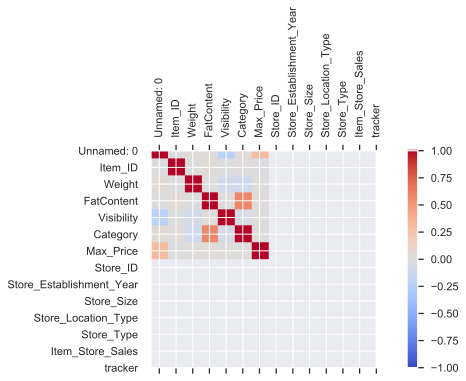

In [174]:
corr = modDf.corr()
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(corr,cmap='coolwarm', vmin=-1, vmax=1)
fig.colorbar(cax)
ticks = np.arange(0,len(modDf.columns),1)
ax.set_xticks(ticks)
plt.xticks(rotation=90)
ax.set_yticks(ticks)
ax.set_xticklabels(modDf.columns)
ax.set_yticklabels(modDf.columns)
plt.show()

In [175]:
corr = modDf.corr()

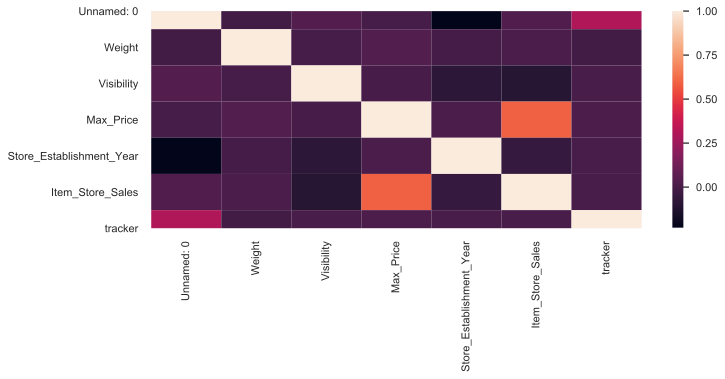

In [176]:
sns.heatmap(corr)


###### Identify Highly Correlated Features

In [177]:
# Create correlation matrix
corr_matrix = modDf.corr().abs()

# Select upper triangle of correlation matrix
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))

In [178]:
# Find index of feature columns with correlation greater than 0.95
to_drop = [column for column in upper.columns if any(upper[column] > 0.95)]

In [179]:
# Drop features 
modDf.drop(modDf[to_drop], axis=1)

Unnamed: 0 Item_ID  Weight FatContent  Visibility  \
0              1   FDA15    9.30    Low Fat        0.02   
1              2   DRC01    5.92    Regular        0.02   
2              3   FDN15   17.50    Low Fat        0.02   
3              5   NCD19    8.93    Low Fat        0.00   
4              6   FDP36   10.39    Regular        0.00   
...          ...     ...     ...        ...         ...   
6104       14591   DRK37    5.00    Low Fat        0.04   
6105       14601   DRG13   17.25    Low Fat        0.04   
6106       14611   NCN14   19.10    Low Fat        0.09   
6107       14621   FDU44   12.15    Regular        0.10   
6108        1463   NCN18    8.89    Low Fat        0.12   

                   Category  Max_Price Store_ID  Store_Establishment_Year  \
0                     Dairy     249.81   OUT049                      1999   
1               Soft Drinks      48.27   OUT018                      2009   
2                      Meat     141.62   OUT049                      1999   
3                 Household      53.86   OUT013                      1987   
4              Baking Goods      51.40   OUT018                      2009   
...                     ...        ...      ...                       ...   
6104            Soft Drinks     189.05   OUT027                      1985   
6105            Soft Drinks     164.75   OUT027                      1985   
6106                 Others     184.66   OUT027                      1985   
6107  Fruits and Vegetables     162.36   OUT019                      1985   
6108              Household     111.75   OUT027                      1985   

     Store_Size Store_Location_Type         Store_Type  Item_Store_Sales  \
0        Medium              Tier 1  Supermarket Type1          3,735.14   
1        Medium              Tier 3  Supermarket Type2            443.42   
2        Medium              Tier 1  Supermarket Type1          2,097.27   
3          High              Tier 3  Supermarket Type1            994.71   
4        Medium              Tier 3  Supermarket Type2            556.61   
...         ...                 ...                ...               ...   
6104     Medium              Tier 3  Supermarket Type3          6,261.85   
6105     Medium              Tier 3  Supermarket Type3          4,111.31   
6106     Medium              Tier 3  Supermarket Type3          2,756.41   
6107      Small              Tier 1      Grocery Store            487.37   
6108     Medium              Tier 3  Supermarket Type3          4,138.61   

      tracker  
0           1  
1           2  
2           3  
3           5  
4           6  
...       ...  
6104     8486  
6105     8488  
6106     8489  
6107     8491  
6108     8505  

[6109 rows x 14 columns]

###### encode categorival variables

In [180]:
# One hot encode the categorical columns
FatContent_one_hot = pd.get_dummies(modDf['FatContent'], 
                                     prefix='FatContent')

Category_one_hot = pd.get_dummies(modDf['Category'], 
                                prefix='Category')

Store_Size_one_hot = pd.get_dummies(modDf['Store_Size'], 
                                   prefix='Store_Size')

# One hot encode the categorical columns
Store_Location_Type_one_hot = pd.get_dummies(modDf['Store_Location_Type'], 
                                     prefix='Store_Location_Type')

Store_Type_one_hot = pd.get_dummies(modDf['Store_Type'], 
                                prefix='Store_Type')

Store_ID_one_hot = pd.get_dummies(modDf['Store_ID'], 
                                   prefix='Store_ID')





In [181]:
# Combine the one hot encoded columns with df_con_enc
modDfenc = pd.concat([modDf, 
                        FatContent_one_hot, 
                        Category_one_hot, 
                        Store_Size_one_hot,
                        Store_Location_Type_one_hot, 
                        Store_Type_one_hot, 
                        Store_ID_one_hot], axis=1)

# Drop the original categorical columns (because now they've been one hot encoded)
modDfenc = modDfenc.drop(['FatContent','Category','Store_Size','Store_Location_Type','Store_Type','Store_ID'], axis=1)

In [182]:
# Let's look at df_con_enc
modDfenc.head(20)

Unnamed: 0 Item_ID  Weight  Visibility  Max_Price  \
0            1   FDA15    9.30        0.02     249.81   
1            2   DRC01    5.92        0.02      48.27   
2            3   FDN15   17.50        0.02     141.62   
3            5   NCD19    8.93        0.00      53.86   
4            6   FDP36   10.39        0.00      51.40   
5            7   FDO10   13.65        0.01      57.66   
6           11   FDY07   11.80        0.00      45.54   
7           12   FDA03   18.50        0.05     144.11   
8           13   FDX32   15.10        0.10     145.48   
9           14   FDS46   17.60        0.05     119.68   
10          15   FDF32   16.35        0.07     196.44   
11          16   FDP49    9.00        0.07      56.36   
12          17   NCB42   11.80        0.01     115.35   
13          18   FDP49    9.00        0.07      54.36   
14          20   FDU02   13.35        0.10     230.54   
15          21   FDN22   18.85        0.14     250.87   
16          23   NCB30   14.60        0.03     196.51   
17          25   FDR28   13.85        0.03     165.02   
18          27   FDV10    7.64        0.07      42.31   
19          28   DRJ59   11.65        0.02      39.12   

    Store_Establishment_Year  Item_Store_Sales  tracker  FatContent_LF  \
0                       1999          3,735.14        1              0   
1                       2009            443.42        2              0   
2                       1999          2,097.27        3              0   
3                       1987            994.71        5              0   
4                       2009            556.61        6              0   
5                       1987            343.55        7              0   
6                       1999          1,516.03       11              0   
7                       1997          2,187.15       12              0   
8                       1999          1,589.26       13              0   
9                       1997          2,145.21       14              0   
10                      1987          1,977.43       15              0   
11                      1997          1,547.32       16              0   
12                      2009          1,621.89       17              0   
13                      1999            718.40       18              0   
14                      2004          2,748.42       20              0   
15                      1987          3,775.09       21              0   
16                      2004          1,587.27       23              0   
17                      1997          4,078.03       25              0   
18                      2004          1,065.28       27              0   
19                      1987            308.93       28              0   

    FatContent_Low Fat  FatContent_Regular  FatContent_low fat  \
0                    1                   0                   0   
1                    0                   1                   0   
2                    1                   0                   0   
3                    1                   0                   0   
4                    0                   1                   0   
5                    0                   1                   0   
6                    1                   0                   0   
7                    0                   1                   0   
8                    0                   1                   0   
9                    0                   1                   0   
10                   1                   0                   0   
11                   0                   1                   0   
12                   1                   0                   0   
13                   0                   1                   0   
14                   1                   0                   0   
15                   0                   1                   0   
16                   1                   0                   0   
17                   0                   1                   0 

### Start Building Machine Learning Models


### Let's seperate the data


In [183]:
# Seclect the dataframe we want to use first for predictions
selected_df = modDfenc

In [184]:
selected_df.head()


Unnamed: 0 Item_ID  Weight  Visibility  Max_Price  \
0           1   FDA15    9.30        0.02     249.81   
1           2   DRC01    5.92        0.02      48.27   
2           3   FDN15   17.50        0.02     141.62   
3           5   NCD19    8.93        0.00      53.86   
4           6   FDP36   10.39        0.00      51.40   

   Store_Establishment_Year  Item_Store_Sales  tracker  FatContent_LF  \
0                      1999          3,735.14        1              0   
1                      2009            443.42        2              0   
2                      1999          2,097.27        3              0   
3                      1987            994.71        5              0   
4                      2009            556.61        6              0   

   FatContent_Low Fat  FatContent_Regular  FatContent_low fat  FatContent_reg  \
0                   1                   0                   0               0   
1                   0                   1                   0               0   
2                   1                   0                   0               0   
3                   1                   0                   0               0   
4                   0                   1                   0               0   

   Category_Baking Goods  Category_Breads  Category_Breakfast  \
0                      0                0                   0   
1                      0                0                   0   
2                      0                0                   0   
3                      0                0                   0   
4                      1                0                   0   

   Category_Canned  Category_Dairy  Category_Frozen Foods  \
0                0               1                      0   
1                0               0                      0   
2                0               0                      0   
3                0               0                      0   
4                0               0                      0   

   Category_Fruits and Vegetables  Category_Hard Drinks  \
0                               0                     0   
1                               0                     0   
2                               0                     0   
3                               0                     0   
4                               0                     0   

   Category_Health and Hygiene  Category_Household  Category_Meat  \
0                            0                   0              0   
1                            0                   0              0   
2                            0                   0              1   
3                            0                   1              0   
4                            0                   0              0   

   Category_Others  Category_Seafood  Category_Snack Foods  \
0                0                 0                     0   
1                0                 0                     0   
2                0                 0                     0   
3                0                 0                     0   
4                0                 0                     0   

   Category_Soft Drinks  Category_Starchy Foods  Store_Size_High  \
0                     0                       0                0   
1                     1                       0                0   
2                     0                       0                0   
3                     0                       0                1   
4                     0                       0                0   

   Store_Size_Medium  Store_Size_Small  Store_Location_Type_Tier 1  \
0                  1                 0                           1   
1                  1                 0                           0   
2                  1                 0                           1   
3                  0                 0                           0   
4                  1                 0                           0   

   Store_

In [185]:
# Split the dataframe into data and labels
X_train = selected_df.drop('Item_Store_Sales', axis=1) # data
y_train = selected_df.Item_Store_Sales # labels

In [186]:
# Shape of the data (without labels)
X_train.shape

(6109, 45)

In [187]:
X_train.head()

Unnamed: 0 Item_ID  Weight  Visibility  Max_Price  \
0           1   FDA15    9.30        0.02     249.81   
1           2   DRC01    5.92        0.02      48.27   
2           3   FDN15   17.50        0.02     141.62   
3           5   NCD19    8.93        0.00      53.86   
4           6   FDP36   10.39        0.00      51.40   

   Store_Establishment_Year  tracker  FatContent_LF  FatContent_Low Fat  \
0                      1999        1              0                   1   
1                      2009        2              0                   0   
2                      1999        3              0                   1   
3                      1987        5              0                   1   
4                      2009        6              0                   0   

   FatContent_Regular  FatContent_low fat  FatContent_reg  \
0                   0                   0               0   
1                   1                   0               0   
2                   0                   0               0   
3                   0                   0               0   
4                   1                   0               0   

   Category_Baking Goods  Category_Breads  Category_Breakfast  \
0                      0                0                   0   
1                      0                0                   0   
2                      0                0                   0   
3                      0                0                   0   
4                      1                0                   0   

   Category_Canned  Category_Dairy  Category_Frozen Foods  \
0                0               1                      0   
1                0               0                      0   
2                0               0                      0   
3                0               0                      0   
4                0               0                      0   

   Category_Fruits and Vegetables  Category_Hard Drinks  \
0                               0                     0   
1                               0                     0   
2                               0                     0   
3                               0                     0   
4                               0                     0   

   Category_Health and Hygiene  Category_Household  Category_Meat  \
0                            0                   0              0   
1                            0                   0              0   
2                            0                   0              1   
3                            0                   1              0   
4                            0                   0              0   

   Category_Others  Category_Seafood  Category_Snack Foods  \
0                0                 0                     0   
1                0                 0                     0   
2                0                 0                     0   
3                0                 0                     0   
4                0                 0                     0   

   Category_Soft Drinks  Category_Starchy Foods  Store_Size_High  \
0                     0                       0                0   
1                     1                       0                0   
2                     0                       0                0   
3                     0                       0                1   
4                     0                       0                0   

   Store_Size_Medium  Store_Size_Small  Store_Location_Type_Tier 1  \
0                  1                 0                           1   
1                  1                 0                           0   
2                  1                 0                           1   
3                  0                 0                           0   
4                  1                 0                           0   

   Store_Location_Type_Tier 2  Store_Location_Type_Tier 3  \
0                           0                           

In [188]:
# Shape of the labels
y_train.shape

(6109,)

In [189]:
selected_df.to_csv("C:/Users/jonathan/Desktop/ilabdata/train_modified.csv",index=False)

##### encode categorical variables

Since scikit-learn only accepts numerical variables, we need to convert all categories of nominal variables into numeric types

In [190]:
#Import library:
#from sklearn.preprocessing import LabelEncoder
#le = LabelEncoder()

In [191]:
#New variable for Store_ID
#modDf['Outlet'] = le.fit_transform(modDf['Store_ID'])

In [192]:
#var_mod = ['FatContent','Category','Store_Size','Store_Location_Type','Store_Type','Store_ID']

In [193]:
#for i in var_mod:
#    modDf[i] = le.fit_transform(modDf[i])

In [194]:
#Dummy Variables:
#modDf = pd.get_dummies(modDf, 
#                      columns =['FatContent','Category','Store_Size','Store_Location_Type','Store_Type','Store_ID'])

In [195]:
#modDf.dtypes

##### exporting data

In [196]:
#Export files as modified versions:
#modDf.to_csv("C:/Users/jonathan/Desktop/ilabdata/train_modified.csv",index=False)

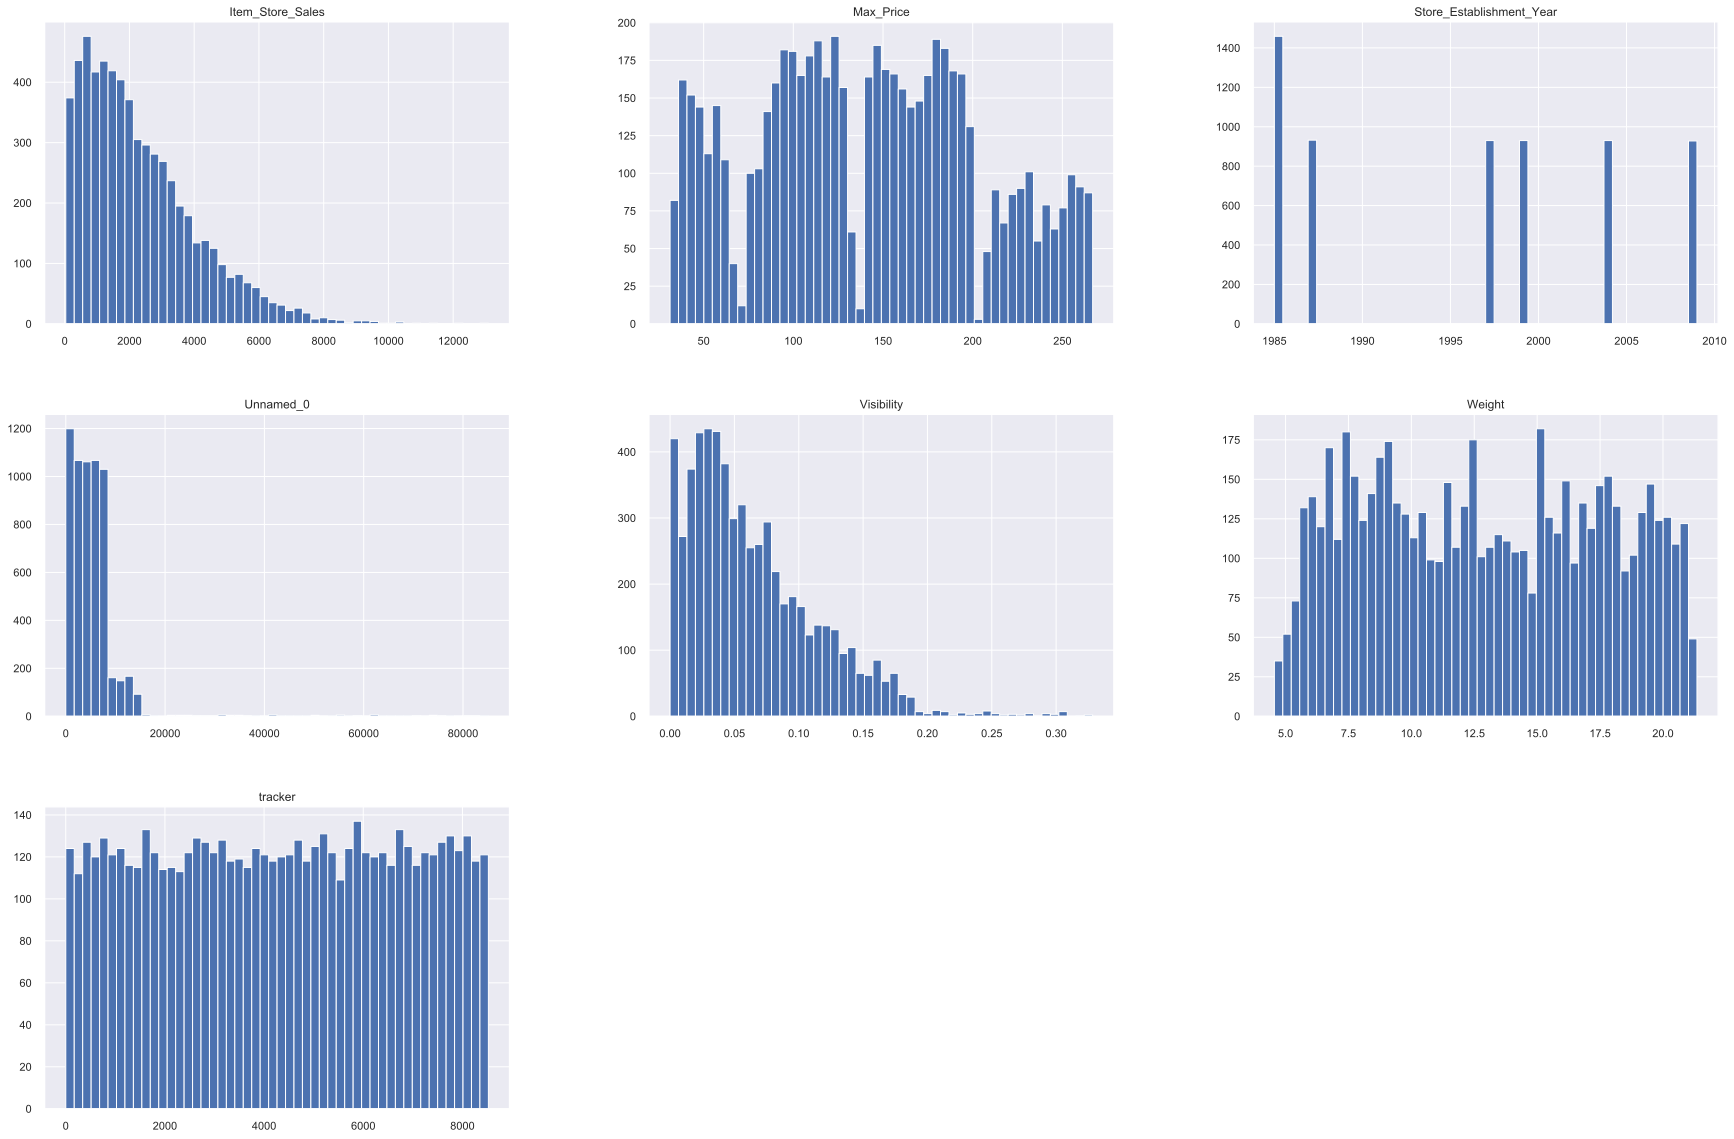

In [197]:
train_bundas.hist(bins=50, figsize=(30,20));